In [1]:
import numpy as np
from Funciones import *

# Determinantes

**Objetivo general**

- Definir el concepto de determinante y estudiar algunas de sus propiedades.

**Objetivos particulares**
- Estudiar la definición inductiva de los determinantes y el caso particular para matrices triangulares y su interpretación como área de un paralelogramo.
- Estudiar algunas propiedades de los teterminantes.
- Desarrollar de un método específico para el cálculo del determinante.

## Contenido
- [1 - Introducción.](#1)
- [2 - Definición de determinante.](#2)
    - [2.1 - Ejemplo 2.1. Cálculo del determinante de una matriz de 2x2.](#2-1)
- [3 - Aplicaciones](#3)
    - [3.1 Ejemplo 3.1. Cálculo del área de un polígono en el plano](#3-1)
        - [3-1-1 Ejemplo - Área de un Triangulo](#3-1-1)
    - [3-2 Obtención de la ecuación implícita de un plano](#3-2)
- [4 - Determinante de Matrices con Python](#4)
- [5 - Propiedades de los determinantes](#5)
    - [5-1 Propiedad 1](#5-1)
    - [5-2 Propiedad 2](#5-2)
    - [5-3 Propiedad 3](#5-3)
    - [5-4 Propiedad 4](#5-4)
    - [5-5 Propiedad 5](#5-5)
    - [5-6 Propiedad 6](#5-6)
- [6 - Cálculo de determinantes por el método de desarrollo por menores](#6)

<a name='1'></a>
## **Introducción**


La función determinante de una matriz es una herramienta que nos permite clasificar los sistemas de ecuaciones lineales según sus soluciones.
La definición de determinante no es sencilla, sin embargo existen reglas que ayudan a obtenerlo dependiendo la dimensión de la matriz, es importante saber que esto solo funciona con __matrices cuadradas__.

<a name='2'></a>
## **1. Definición**

Sea $A \in M_{n\times n}$ sobre $\mathbb{R}$ el determinante de $A$ se define como sigue.

$$det(A)=\begin{cases}
a_{0,0}*a_{1,1}-a_{0,1}*a_{1,0} & n=2\\
\sum_{i=0}^{n-1}\left(-1\right)^{i}*a_{0,i}*det\left(subMatriz_{0,i}\left(A\right)\right) & n\geq2
\end{cases}$$

donde la función $subMatriz_{0,i}\left(A\right)$ elimina el renglón cero y la columna $i$ de la matriz $A$.


<a name='2-1'></a>
#### Ejemplo 1: Determinante de una matriz de 2x2.

$$A=\left(\begin{array}{cc}
2 & 3\\
4 & 5\\
\end{array}\right)$$

$$det(A)
=
\left(2\right)\left(5\right)
-
\left(4\right)\left(3\right)
=-2.$$

<a name='3'></a>
## 2. Aplicaciones

<a name='3-1'></a>
### **2.1. Cálculo del área de de un polígono en el plano**

Sea $P$ un polígono en el plano de $N$ vértices descritos por los siguientes puntos: 
$$
\begin{equation}
    \begin{matrix}
        P_1 & = & (x_1,y_1)\\
        P_2 & = & (x_2,y_2)\\
        P_3 & = & (x_3,y_3)\\
        \vdots & & \vdots\\
        P_N & = & (x_N,y_N)\\
    \end{matrix}
\end{equation}
$$

Se calcula el área de dicho polígono con la formula Área:

$$
Área=
\begin{equation}
\left|
\frac{1}{2}
\left(
    \begin{pmatrix}
        x_1 & y_1\\
        x_2 & y_2\\
    \end{pmatrix}
    +
    \begin{pmatrix}
        x_2 & y_2\\
        x_3 & y_3\\
    \end{pmatrix}
    +
    \dots
    +
    \begin{pmatrix}
        x_{N-1} & y_{N-1}\\
        x_N & y_N\\
    \end{pmatrix}
\right)
\right|
\end{equation}
$$

<a name='3-1-1'></a>
#### Ejemplo 2.1 - Área de un triángulo

Calcular el área de un triángulo cuyos vértices son: $A(2, 0), B(3,4)$ y $C(-2,5)$

Primero, con la funcion _puntos_poligono(n)_ podemos ingresar los vertices del triangulo deseado, _n_ es el numero de vertices del poligono, en este caso 3.

In [5]:
Triangulo = puntos_poligono(3)

Ingresa valor de X del punto 1: 2
Ingresa valor de Y del punto 1: 0
Ingresa valor de X del punto 2: 3
Ingresa valor de Y del punto 2: 4
Ingresa valor de X del punto 3: -2
Ingresa valor de Y del punto 3: 5


Ocuparemos la funcion _graficar_poligono_ para mostrar el poligono ingresado

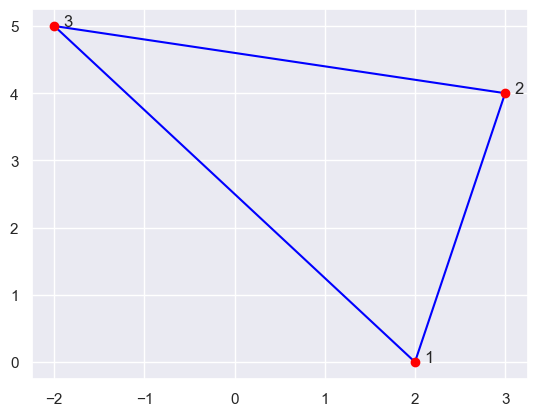

In [6]:
graficar_poligono(Triangulo)

Ahora, creamos la funcion que nos permite calcular el área del poligono de acuerdo a la formula de [Área](#Area)


In [9]:
def calcular_area(puntos):
    area = 0
    for i in range(len(puntos)):
        if i in range(len(puntos)-1):
            area = area + np.linalg.det((puntos[i],puntos[i+1]))
        else:
            area = area + np.linalg.det((puntos[-1],puntos[0]))
    area = abs((1/2)*area)
    return area

In [12]:
Area = calcular_area(Triangulo)

print(f"El área del triangulo de vertices A(2,0), B(3,4) y C(-2,5) es: {Area}")

El área del triangulo de vertices A(2,0), B(3,4) y C(-2,5) es: 10.5


Prueba utlizar estas 3 funciones (_puntos_poligono_, _graficar_poligono_ y _calcular_area_) para calcular el área de cualquier poligono en el plano, puedes auxiliarte de la funcion _help_ para ver los comentarios de estas funciones.

<a name='3-2'></a>
### **2.2 Obtención de la ecuación implícita de un plano**

La obtención de la ecuación implícita de un plano puede efectuarse mediante el desarrollo de un determinante nulo, cuyas entradas están en función de las coordenadas de un punto en dicho plano y un par de vectores del mismo que no sean paralelos.

Sea

$$
P(P_x,P_y,P_z)
$$

Un punto en un plano y

$$
\begin{equation}
    \begin{matrix}
    \vec{u} & = & (u_x,u_y,u_z) \\
    \vec{v} & = & (v_x,v_y,v_z) 
    \end{matrix}
\end{equation}
$$

Dos vectores no paralelos del mismo plano. Entonces la ecuación cartesiana de un plano se obtiene resolviendo el siguiente determinante e igualando a cero:

$$
\begin{equation}
    \begin{vmatrix}
        x-P_x & y-P_y & z-P_z \\
        u_x & u_y & u_z \\
        v_x & v_y & v_z
    \end{vmatrix}
    =
    0
\end{equation}
$$

De forma que la ecuacion cartesiana del plano queda como:
$$
\begin{equation}
    Ax+By+Cz+D=0
\end{equation}
$$

Donde 

$$
\begin{equation}
    \begin{matrix}
        A =  (u_y v_z - u_z v_y)\\
        B =  (u_z v_x - u_x v_z)\\
        C =  (u_x v_y - u_y v_x)\\
        D =  P_x(u_z v_y - u_y v_z) + P_y(u_x v_z - u_z v_x) + P_z(u_y v_x - u_x v_y)
    \end{matrix}
\end{equation}
$$

Es evidente que el cálculo de los determinantes se vuelve mas complejo conforme la dimensión de la matriz aumenta.

A continuación se muestra como obtener el determinante con numpy.

In [19]:
# Importamos la libreria que  da soporte para crear vectores y matrices grandes multidimensionales, 
#Junto con una gran colección de funciones matemáticas de alto nivel para operar con ellas
import numpy as np

#Pedimos que nos de la leyenda que nos pida ingresar la matriz
print("Ingrese la matriz a la que se le sacará el determinante")

#Pedimos que ingrese el número de filas y columnas que tiene la matriz
print("Recuerde que debe ingresar una matriz cuadrada")

filas = int(input ("Indique el número de filas: "))

#Creamos la matriz en las que se guardarán los valores que el usuario proporcione 
matriz1 = np.zeros((filas,filas))

# Le pedimos que ingrese la matriz elemento por elemento y vamos llenando
# Esta función es igual a la funcion crear_matriz() ocupada antes
print ('Ingrese la matriz')
for i in range(filas):
    for j in range(filas):
        matriz1[i][j] = np.array( float(input('Elemento (%d,%d): ' % (i+1, j+1))))
        
print("su matriz es:" )

#Utilizamos una funcion propia para mostrar la matriz ingresada con un mejor formato
Mostrar_Matriz(matriz1)

#sacamos el determinante
#Mediante la función linealg.det() de Numpy obtenemos el determinante
print("El determinante de su matriz es:",np.linalg.det(matriz1))


Ingrese la matriz a la que se le sacará el determinante
Recuerde que debe ingresar una matriz cuadrada
Indique el número de filas: 3
Ingrese la matriz
Elemento (1,1): 1
Elemento (1,2): 3
Elemento (1,3): 6
Elemento (2,1): 3
Elemento (2,2): 11
Elemento (2,3): 7
Elemento (3,1): 5
Elemento (3,2): 3
Elemento (3,3): 3
su matriz es:


<IPython.core.display.Latex object>

El determinante de su matriz es: -186.00000000000009


<a name='5'></a>
## **Propiedades de los determinantes**

<a name='5-1'></a>
### Propiedad 1
El determinante de una matriz triangular es igual al producto de sus componentes en la diagonal.

Es decir que sea $A$ una matriz como la que se muestra a continuacion:

$$\begin{equation} A_{n\times n} =
\begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1n}\\
0 & a_{22} & \cdots & a_{2n}\\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & \cdots & a_{nn}
\end{pmatrix}
\end{equation}$$

Entonces $det(A)$= $a_{11}$*$a_{22}$*$a_{33}$*....*$a_{nn}$

A continuación, se muestra un ejemplo de matriz diagonal

In [91]:
#Matriz diagonal 

print("Matriz diagonal A:")

#Creamos la matriz mediante la funcion propia DiagonalMatriz()
A = DiagonalMatriz()

Matriz diagonal A:
Ingrese el numero de filas, recuerde que se trata de una matriz Cuadrada: 3
Ingrese las entradas de la matriz: 

Ingrese el valor del elemento (1,1): 11
Ingrese el valor del elemento (1,2): 2
Ingrese el valor del elemento (1,3): 3
Ingrese el valor del elemento (2,2): 1
Ingrese el valor del elemento (2,3): 4
Ingrese el valor del elemento (3,3): 2


<IPython.core.display.Latex object>

Sacamos el determinante mediante linalg de la paqueteria numpy

In [112]:
print("El determinante de su matriz, calculado con Numpy, es:", np.linalg.det(A))

El determinante de su matriz, calculado con Numpy, es: 22.000000000000004


De igual forma podemos crear una función para calcular el determinante con la formula mostrada

In [113]:
det = 1
cadena = ''
for i in range(len(A)):
    det = det * A[i][i]
    if i in range(0,len(A)-1):
        cadena = cadena + f'{A[i][i]} * '
    else:
        cadena = cadena + f'{A[i][i]} = '
print(f'El determinante de su matriz, calculado con la formula, es {cadena}{det}')

El determinante de su matriz, calculado con la formula, es 11.0 * 1.0 * 2.0 = 22.0


Notamos que ambos resultados son iguales, salvo decimales que dependen del metodo de redondeo de Python

<a name='5-2'></a>
### Propiedad 2

Si una matriz $B$ se obtiene intercambiando dos filas o intercambiando dos columnas de una matriz $A$ entonces:

 $det(B)$ = $−det(A)$

In [120]:
print("Matriz A de dimensión 3x3 :")

A= np.array([[11,2,3],[0,1,4],[6,4,2]])
Mostrar_Matriz(A)

#Sacamos el determinante de A
print("El determinante de su matriz A es:", np.linalg.det(A))

print("\nSe intercambian la columna 1 y la columna 2")
print("Matriz B de dimensión 3x3 :")
B= np.array([[2,11,3],[1,0,4],[4,6,2]])
Mostrar_Matriz(B)

#sacamos el determinante de B
print("El determinante de su matriz B es:", np.linalg.det(B))

Matriz A de dimensión 3x3 :


<IPython.core.display.Latex object>

El determinante de su matriz A es: -124.00000000000003

Se intercambian la columna 1 y la columna 2
Matriz B de dimensión 3x3 :


<IPython.core.display.Latex object>

El determinante de su matriz B es: 123.99999999999991


Nuevamente, observamos que la propiedad se cumple, salvo decimales

<a name='5-3'></a>
### Propiedad 3

Si $A$ y $B$ son matrices diagonales de ${n \times n}$, entonces $det AB$=$det A$ $det B$. 

In [124]:
#Solicitamos al usuario las matrices 
print("Recuerde que deben ser matrices cuadradas y diagonales")
filas1 = int(input ("Indique el número de filas y columnas de la matriz: "))


#creamos las matrices en las que se guardarán los valores que el usuario proporcione y los de la suma
A = np.zeros((filas1,filas1))    
B = np.zeros((filas1,filas1))   
 #llenamos la matriz 1 con los datos del usuario
print ("Ingrese la primer matriz")

for i in range(filas1):
        for j in range(filas1):
            A[i][j] = float(input('Elemento (%d,%d): ' % (i+1, j+1)))
print( "su matriz 1 es:")

Mostrar_Matriz(A)

#llenamos la matriz 2
print ("Ingrese la segunda matriz")
for i in range(filas1):
        for j in range(filas1):
            B[i][j] = float(input('Elemento (%d,%d): ' % (i+1, j+1)))
print( "su matriz 2 es:")

Mostrar_Matriz(B)

#Recordamos que la función dot() nos devuelve un producto matricial
C = A.dot(B)
print("El producto de las matrices es:")

Mostrar_Matriz(C)

print("El determinante de su matriz A es:", np.linalg.det(A))

print("El determinante de su matriz B es:", np.linalg.det(B))

print("El determinante de su matriz A*B es:", np.linalg.det(C))

print(f"Y notemos que {np.linalg.det(A)} * {np.linalg.det(B)} es {np.linalg.det(A) * np.linalg.det(B)}")

Recuerde que deben ser matrices cuadradas y diagonales
Indique el número de filas y columnas de la matriz: 3
Ingrese la primer matriz
Elemento (0,0): 11
Elemento (0,1): 2
Elemento (0,2): 5
Elemento (1,0): -1
Elemento (1,1): 3
Elemento (1,2): 2
Elemento (2,0): 5
Elemento (2,1): 0
Elemento (2,2): 1
su matriz 1 es:


<IPython.core.display.Latex object>

Ingrese la segunda matriz
Elemento (0,0): 3
Elemento (0,1): 3
Elemento (0,2): 1
Elemento (1,0): 0
Elemento (1,1): -2
Elemento (1,2): 3
Elemento (2,0): 9
Elemento (2,1): 6
Elemento (2,2): 3
su matriz 2 es:


<IPython.core.display.Latex object>

El producto de las matrices es:


<IPython.core.display.Latex object>

El determinante de su matriz A es: -20.000000000000007
El determinante de su matriz B es: 27.0
El determinante de su matriz A*B es: -539.9999999999992
Y notemos que -20.000000000000007 * 27.0 es -540.0000000000002


<a name='5-4'></a>
### Propiedad 4

No se cumple en general que el $det (A + B)$=$det A + det B$

In [130]:
A= np.array([[11,2],[0,1]])
print("La matriz A es:")
Mostrar_Matriz(A)

#sacamos el determinante
print("El determinante de la matriz A es:", np.linalg.det(A))

S= np.array([[23,12],[11,3]])
print("\nLa matriz B es:")
Mostrar_Matriz(S)

#sacamos el determinante
print("El determinante de la matriz B es:", np.linalg.det(S))


print("\nLa suma de las matrices es:")
T=A+S
Mostrar_Matriz(T)

print("El determinante de la matriz suma es:", np.linalg.det(T))

La matriz A es:


<IPython.core.display.Latex object>

El determinante de la matriz A es: 11.000000000000002

La matriz B es:


<IPython.core.display.Latex object>

El determinante de la matriz B es: -62.99999999999999

La suma de las matrices es:


<IPython.core.display.Latex object>

El determinante de la matriz suma es: -18.000000000000014


Pdemos notar que la suma del determinante de $A$ y el determinante de $B$ no son el determinante de la matriz suma

<a name='5-5'></a>
### Propiedad 5

Si dos filas (columnas) de $A$ son iguales, entonces $det(A) = 0$

In [133]:
S= np.array([[23,12,4],[23,12,4],[11,3,6]])
Mostrar_Matriz(S)

#Sacamos el determinante
print("El determinante de su matriz es:", np.linalg.det(S))

<IPython.core.display.Latex object>

El determinante de su matriz es: 0.0


<a name='5-6'></a>
### Propiedad 6

El determinante de una matriz con un escalar es el escalar por el determinante de la matriz, es decir:

Si $C$= $\tau$*$A_{n\times n}$ ,  
entonces $det(C)$= $\tau$ * det($A_{n\times n}$)

Estas son solo algunas de las propiedades que los determinantes poseen.


<a name='6'></a>

## **Cálculo de determinantes por el método de desarrollo por menores**

Para el cálculo de determinantes por este método se toma como referencia una fila o una columna y se va eliminando sus elementos (de acuerdo a su posición) y formando los determinantes de un orden inferior a la matriz original; el cual queda multiplicado por este elemento y su signo de posición. Es decir cada elemento de la fila o la columna seleccionada se multiplica por su determinante menor y el signo de posición. 

Los signos de posición se obtienen siempre comenzando con positivo y alternando luego. 

Por ejemplo para una matriz ${3 \times 3}$ los signos serían :


$$\begin{equation} A_{3\times 3} = 
\begin{pmatrix}
+ & - & +  \\
- & + & - \\
+ & - & +
\end{pmatrix}
\end{equation}$$

Para una matriz de ${4\times 4}$ se tiene:

$$\begin{equation} A_{4\times 4} = 
\begin{pmatrix}
+ & - & + & - \\
- & + & - & + \\
+ & - & + & - \\
- & + & - & + 
\end{pmatrix}
\end{equation}$$

Para una matriz de ${5\times 5}$ se tiene:

$$\begin{equation} A_{5\times 5} = 
\begin{pmatrix}
+ & - & + & - & +\\
- & + & - & + & - \\
+ & - & + & - & + \\
- & + & - & + & - \\
+ & - & + & - & +
\end{pmatrix}
\end{equation}$$

y asi sucesivamente se lleva a cabo el procedimiento antes descrito, por ejemplo calcularemos el determinante de una matriz de ${3\times 3}$.

$$\begin{equation} A_{3\times 3} = 
\begin{pmatrix}
a_{11} & a_{12} & a_{13} \\
a_{21}& a_{22} & a_{23}\\
a_{31}& a_{32}& a_{33}
\end{pmatrix}
\end{equation}$$

Entonces como primer paso tomamos el primer elemento y lo multiplicamos por el determinante de la matriz que se obtiene al eliminar la primera fila y la primer columna, es decir:

- primer elemento del determinante :

$$\begin{equation}
a_{11}*\begin{vmatrix}
a_{22} & a_{23}\\
a_{32} & a_{33}
\end{vmatrix}= + a_{11}*[(a_{22}*a_{33})-(a_{23}*a_{32})]=a
\end{equation}$$

- segundo elemento del determinante :
para este se toma el segundo elemento de la matriz y se multiplica por el determinante de la matriz que resta al quitar el primer renglón y la segunda columna.


$$\begin{equation}
-a_{12}*\begin{vmatrix}
a_{21} & a_{23}\\
a_{31} & a_{33}
\end{vmatrix}= - a_{12}*[(a_{21}*a_{33})-(a_{23}*a_{31})]=b
\end{equation}$$

- tercer elemento del determinante :
para este se toma el tercer elemento de la matriz y se multiplica por el determinante de la matriz que resta al quitar el primer renglón y la tercer columna.

$$\begin{equation}
+a_{13}*\begin{vmatrix}
a_{21} & a_{22}\\
a_{31} & a_{32}
\end{vmatrix}= a_{13}*[(a_{21}*a_{32})-(a_{22}*a_{31})]=c
\end{equation}$$


Todo lo anterior tomando en cuenta los signos de los elementos según la posición del elemento y el signo qe le corresponde por lo que se explico al inicio del método. 
Por último se obtiene que:


$$\begin{equation} det(A) = 
\begin{pmatrix}
a_{11} & a_{12} & a_{13} \\
a_{21}& a_{22} & a_{23}\\
a_{31}& a_{32}& a_{33}
\end{pmatrix} = \pm a \pm b \pm c
\end{equation}$$

De manera similar se hace lo anterior con matrices de orden mayor hasta que se logre disminuir a un orden en el que sea mas fácil calcular el determinante.

# **Referencias**

•	Kolman, B., & Hill, D. R. (2006). Algebra lineal. Pearson Educación.

•	Grossman, S., & Flores Godoy, J. J. (2012). Álgebra Lineal (Séptima edición). McGraw Hill.

